# MSDS692 Project: Data Preprocessing - Alcohol Sales, CO
## Natalia Weakly    

### Original data source: https://www.colorado.gov/pacific/revenue/colorado-liquor-excise-taxes
Alcohol sales in gallons

In [1]:
#Imports
import pandas as pd
import numpy as np
import os
import datetime

In [2]:
# Load data
# alcohol_2014, alcohol_2015, alcohol_2016, alcohol_2017, alcohol_2018 =
alcohol_sales_files = ['AlcoholSalesCO_2014.xlsx', 'AlcoholSalesCO_2015.xlsx', 'AlcoholSalesCO_2016.xlsx', 'AlcoholSalesCO_2017.xlsx', 'AlcoholSalesCO_2018.xlsx']
list_alcohol_sales = []
for file_name in alcohol_sales_files:
    alcohol_sales = pd.read_excel(file_name, header=None)
    list_alcohol_sales.append(alcohol_sales)


In [3]:
# Concatenate all data frames into one
alcohol_sales_data = pd.concat(list_alcohol_sales, axis=1)

In [4]:
# check results
alcohol_sales_data

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01,2018-12-01
1,3.2 % Beer,379023,297695,212979,432639,346903,437706,484321,452079,415127,...,295401,322467,415156,467840,464848,455192,357540,357198,NaT,NaT
2,Repeal Beer,8285825,7986097,5266684,11800227,8645076,9091681,10828375,10201298,9392870,...,8781379,8961434,10976429,11673326,10835661,11964801,9542416,9038194,NaT,NaT
3,Spiritious Liquors,745256,815728,891014,965511,1006886,1198876,904332,928932,938769,...,1127897,983583,1280263,1443123,1081737,1265508,1049497,1204850,NaT,NaT
4,Hard Cider,49114,29505,21671,57169,48052,59636,66905,71118,80414,...,96834,100490,128097,139408,136425,129143,109686,106255,NaT,NaT
5,Wine,1271371,1178519,1896136,1022223,1594599,1337679,1424128,1406946,1339836,...,1462188,1366953,1619821,1648142,1457177,1821044,1348294,1662984,NaT,NaT
6,Total,10730589,10307543,8288483,14277768,11641515,12125578,13708061,13060373,12167016,...,11763699,11734927,14419766,15371839,13975847,15635689,12407434,12369481,NaT,NaT


In [5]:
# Transpose the data frame
alcohol=alcohol_sales_data.transpose()

In [6]:
# Check results
alcohol.head(10)

,0,1,2,3,4,5,6
0,type,3.2 % Beer,Repeal Beer,Spiritious Liquors,Hard Cider,Wine,Total
1,2014-01-01 00:00:00,379023,8285825,745256,49114,1271371,10730589
2,2014-02-01 00:00:00,297695,7986097,815728,29505,1178519,10307543
3,2014-03-01 00:00:00,212979,5266684,891014,21671,1896136,8288483
4,2014-04-01 00:00:00,432639,11800227,965511,57169,1022223,14277768
5,2014-05-01 00:00:00,346903,8645076,1006886,48052,1594599,11641515
6,2014-06-01 00:00:00,437706,9091681,1198876,59636,1337679,12125578
7,2014-07-01 00:00:00,484321,10828375,904332,66905,1424128,13708061
8,2014-08-01 00:00:00,452079,10201298,928932,71118,1406946,13060373
9,2014-09-01 00:00:00,415127,9392870,938769,80414,1339836,12167016


In [7]:
# Add column names
alcohol.columns=['date', '3.2%_beer', 'repeal_beer', 'spiritious_liquors', 'hard_cider', 'wine', 'all_alcohol_sales']

In [8]:
# Check results
alcohol.head()

,date,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,all_alcohol_sales
0,type,3.2 % Beer,Repeal Beer,Spiritious Liquors,Hard Cider,Wine,Total
1,2014-01-01 00:00:00,379023,8285825,745256,49114,1271371,10730589
2,2014-02-01 00:00:00,297695,7986097,815728,29505,1178519,10307543
3,2014-03-01 00:00:00,212979,5266684,891014,21671,1896136,8288483
4,2014-04-01 00:00:00,432639,11800227,965511,57169,1022223,14277768


In [9]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 12
Data columns (total 7 columns):
date                  65 non-null object
3.2%_beer             63 non-null object
repeal_beer           63 non-null object
spiritious_liquors    63 non-null object
hard_cider            63 non-null object
wine                  63 non-null object
all_alcohol_sales     63 non-null object
dtypes: object(7)
memory usage: 6.6+ KB


In [10]:
#drop rows with strings (drink types)
alcohol_cleaned=alcohol[alcohol.date != 'type']

In [11]:
# Check results
alcohol_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 12
Data columns (total 7 columns):
date                  60 non-null object
3.2%_beer             58 non-null object
repeal_beer           58 non-null object
spiritious_liquors    58 non-null object
hard_cider            58 non-null object
wine                  58 non-null object
all_alcohol_sales     58 non-null object
dtypes: object(7)
memory usage: 3.8+ KB


In [12]:
# Display the data frame
alcohol_cleaned

,date,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,all_alcohol_sales
1,2014-01-01 00:00:00,379023,8285825,745256,49114,1271371,10730589
2,2014-02-01 00:00:00,297695,7986097,815728,29505,1178519,10307543
3,2014-03-01 00:00:00,212979,5266684,891014,21671,1896136,8288483
4,2014-04-01 00:00:00,432639,11800227,965511,57169,1022223,14277768
5,2014-05-01 00:00:00,346903,8645076,1006886,48052,1594599,11641515
6,2014-06-01 00:00:00,437706,9091681,1198876,59636,1337679,12125578
7,2014-07-01 00:00:00,484321,10828375,904332,66905,1424128,13708061
8,2014-08-01 00:00:00,452079,10201298,928932,71118,1406946,13060373
9,2014-09-01 00:00:00,415127,9392870,938769,80414,1339836,12167016
10,2014-10-01 00:00:00,380558,9155223,1011479,95887,1512008,12155154


In [13]:
# Use fillforward (use last known values) to impute missing values for Nov and December 2018
alcohol_cleaned2= alcohol_cleaned.fillna(method='ffill')

In [14]:
# Reset the index
alcohol_new = alcohol_cleaned2.reset_index(drop=True)

In [15]:
# Check results
alcohol_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
date                  60 non-null datetime64[ns]
3.2%_beer             60 non-null int64
repeal_beer           60 non-null int64
spiritious_liquors    60 non-null int64
hard_cider            60 non-null int64
wine                  60 non-null int64
all_alcohol_sales     60 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.4 KB


In [16]:
#columns to be converted to numeric
columns_to_numbers = ['3.2%_beer', 'repeal_beer', 'spiritious_liquors', 'hard_cider', 'wine', 'all_alcohol_sales']

for column in columns_to_numbers:
    alcohol_new[column]=pd.to_numeric(alcohol_new[column], errors='coerce')

In [17]:
alcohol_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
date                  60 non-null datetime64[ns]
3.2%_beer             60 non-null int64
repeal_beer           60 non-null int64
spiritious_liquors    60 non-null int64
hard_cider            60 non-null int64
wine                  60 non-null int64
all_alcohol_sales     60 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.4 KB


In [18]:
# Check results
alcohol_new

,date,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,all_alcohol_sales
0,2014-01-01,379023,8285825,745256,49114,1271371,10730589
1,2014-02-01,297695,7986097,815728,29505,1178519,10307543
2,2014-03-01,212979,5266684,891014,21671,1896136,8288483
3,2014-04-01,432639,11800227,965511,57169,1022223,14277768
4,2014-05-01,346903,8645076,1006886,48052,1594599,11641515
5,2014-06-01,437706,9091681,1198876,59636,1337679,12125578
6,2014-07-01,484321,10828375,904332,66905,1424128,13708061
7,2014-08-01,452079,10201298,928932,71118,1406946,13060373
8,2014-09-01,415127,9392870,938769,80414,1339836,12167016
9,2014-10-01,380558,9155223,1011479,95887,1512008,12155154


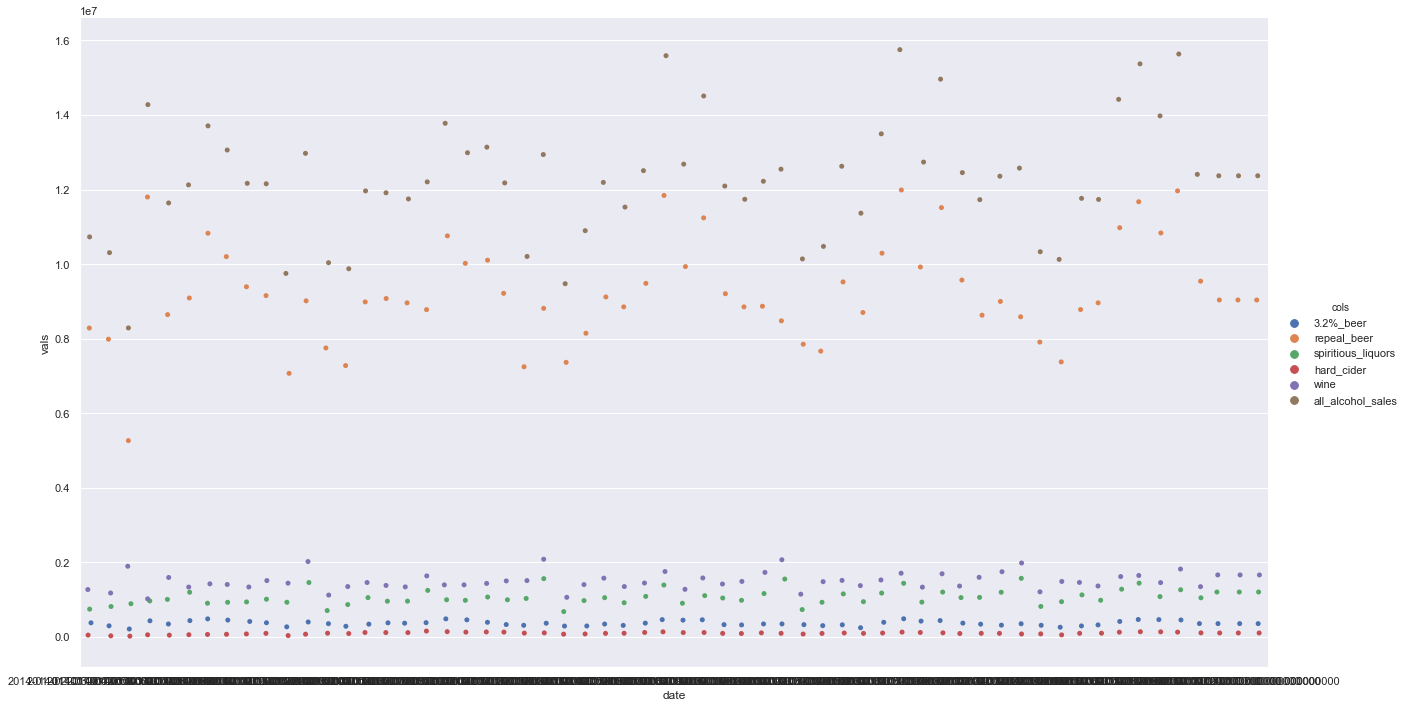

In [21]:
alcohol_new_melt = alcohol_new.melt('date', var_name='cols', value_name='vals')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
g=sns.catplot(x='date', y='vals', hue='cols', data=alcohol_new_melt, height=10, aspect=1.8)

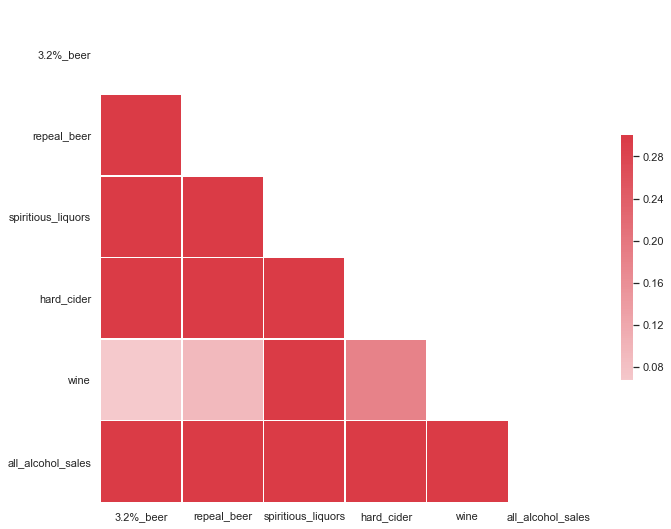

In [20]:
# Look for the correlation between variables
# Correlation matrix example at https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation 

sns.set(style="white")
corr = alcohol_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [22]:
# Print out correlation matrix
corr

,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,all_alcohol_sales
3.2%_beer,1.000000,0.861730,0.330615,0.486490,0.067943,0.838073
repeal_beer,0.861730,1.000000,0.414911,0.567258,0.092531,0.966389
spiritious_liquors,0.330615,0.414911,1.000000,0.389246,0.838259,0.625337
hard_cider,0.486490,0.567258,0.389246,1.000000,0.180885,0.598796
wine,0.067943,0.092531,0.838259,0.180885,1.000000,0.338047
all_alcohol_sales,0.838073,0.966389,0.625337,0.598796,0.338047,1.000000


Wine and cider show relatively lower correlation rates with sales of other types of alcohol. The beer has the highest correlation rate with total alcohol sales in Colorado.

In [23]:
# Output the processed alcohol sales data a file for future use
alcohol_new.to_csv('alcoholSalesCO.csv', date_format='%Y-%m-%d %H:%M:%S')